In [ ]:
# auto_arima

In [1]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset

In [3]:
# Paso 2: Cargar la base de datos y procesar los datos
aerolinea = pd.read_csv("/home/daniel/Drive WLS/Cursos/machine-learning/series_de_tiempo/Data/AirPassengers.csv", index_col='Month')
aerolinea = aerolinea.rename(columns={'#Passengers': 'Pasajeros'})
aerolinea.index = pd.to_datetime(aerolinea.index)

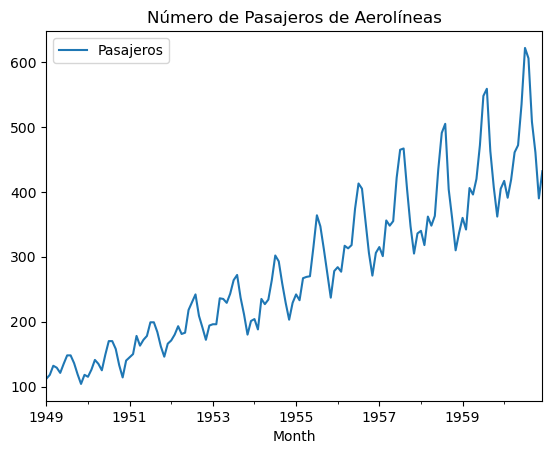

In [4]:
# Visualización rápida de los datos
aerolinea.plot(title="Número de Pasajeros de Aerolíneas")
plt.show()

In [5]:
# Paso 3: Dividir los datos en entrenamiento (baseA) y prueba (baseB)
baseA = aerolinea[0:132]  # Datos de entrenamiento
baseB = aerolinea[132:144]  # Datos de prueba

In [6]:
# Paso 4: Aplicar auto_arima en los datos de entrenamiento (baseA)
modelo_auto = auto_arima(baseA['Pasajeros'], seasonal=True, m=12, trace=True, stepwise=False)
# max_p, max_q, max_P, max_Q (opcional)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1022.029, Time=0.22 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1023.211, Time=0.54 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1022.267, Time=2.02 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1022.869, Time=0.94 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1024.889, Time=0.83 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=965.311, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.34 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=965.277, Time=0.64 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=963.317, Time=0.59 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=967.282, Time=1.08 sec
 ARIMA(0,0,1)(2

In [7]:
# Paso 5: Hacer pronósticos para el período de prueba (baseB)
n_periods = len(baseB)
predicciones_auto_arima = modelo_auto.predict(n_periods=n_periods)

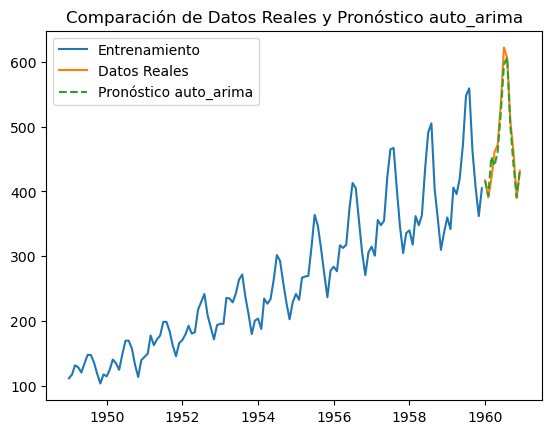

In [8]:
# Paso 6: Visualizar las predicciones en comparación con los datos reales
plt.plot(baseA.index, baseA['Pasajeros'], label='Entrenamiento')
plt.plot(baseB.index, baseB['Pasajeros'], label='Datos Reales')
plt.plot(baseB.index, predicciones_auto_arima, label='Pronóstico auto_arima', linestyle='--')
plt.legend()
plt.title("Comparación de Datos Reales y Pronóstico auto_arima")
plt.show()

In [9]:
# Paso 7: Calcular el RMSE para comparar el error de predicción
rmse_auto_arima = np.sqrt(mean_squared_error(baseB['Pasajeros'], predicciones_auto_arima))
print(f"RMSE del modelo auto_arima: {rmse_auto_arima:.2f}")

RMSE del modelo auto_arima: 15.86


In [10]:
# Comparación con el RMSE del modelo manual (RMSE proporcionado)
rmse_manual = 17.15  # Valor del RMSE manual que mencionaste
print(f"RMSE del modelo manual: {rmse_manual}")

RMSE del modelo manual: 17.15


In [11]:
# Resultado de la comparación
if rmse_auto_arima < rmse_manual:
    print("El modelo auto_arima tiene un mejor ajuste que el modelo manual.")
else:
    print("El modelo manual tiene un mejor ajuste que el modelo auto_arima.")

El modelo auto_arima tiene un mejor ajuste que el modelo manual.
